In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import copy, math
from mpl_toolkits.mplot3d.axes3d import Axes3D

#plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

data collection and processing

In [9]:
sonar_data=pd.read_csv('/content/sonar data.csv',header = None)

sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [10]:
sonar_data.shape

(208, 61)

In [11]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [12]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [13]:
# M represents mine
# R represents rock
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [14]:
X=sonar_data.drop(columns=60, axis=1)
Y=sonar_data[60]


In [15]:
print(Y)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)


In [48]:
print(Y_train)

115    M
38     R
56     R
123    M
18     R
      ..
140    M
5      R
154    M
131    M
203    M
Name: 60, Length: 187, dtype: object


In [ ]:
# Creating a DataFrame
df = pd.DataFrame(sonar_data)
# Splitting each column and storing them in arrays
column_arrays = {}  # Dictionary to hold arrays for each column

for col_name, col_data in df.items():
    column_arrays[col_name] = col_data.values  # Storing column data as arrays

# Accessing the arrays
for col_name, col_array in column_arrays.items():
    print(f"Array for column '{col_name}':")
    print(col_array)
    print("\n")

In [ ]:
# Printing the list of keys using keys() method
keys_list = list(column_arrays.keys())
print(keys_list)


In [ ]:
print(column_arrays[0])

In [ ]:
# Plot the data points
#plt.scatter(column_arrays[0], Y, marker='x', c='r')
plt.scatter(column_arrays[0], Y, marker='x', s=80, c = 'red', label="y=M")
plt.scatter(column_arrays[0], Y, marker='o', s=100,c='blue', label="y=R", facecolors='none',
              lw=3)
# Set the title
plt.title("Mine and Rock")
# Set the y-axis label
plt.ylabel('M/R')
# Set the x-axis label
plt.xlabel('size')
plt.show()



In [ ]:
x0 = np.arange(0,6)

x1 = np.array([3]*6)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plt.scatter(column_arrays[1], Y, marker='x', c='r')
# Set the title
plt.title("Mine and Rock")
# Set the y-axis label
plt.ylabel('M/N')
# Set the x-axis label
plt.xlabel('')
plt.show()
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

In [ ]:
# Plot the data points
plt.scatter(column_arrays[1], Y, marker='x', c='r')
# Set the title
plt.title("Mine and Rock")
# Set the y-axis label
plt.ylabel('M/N')
# Set the x-axis label
plt.xlabel('')
plt.show()

In [49]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [50]:
model = LogisticRegression()

In [51]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
exp_array = np.exp(column_arrays[0])

print("Input to exp:", column_arrays[0])
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

In [33]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))

    return g

In [ ]:
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Text(0.5, 0, 'z')

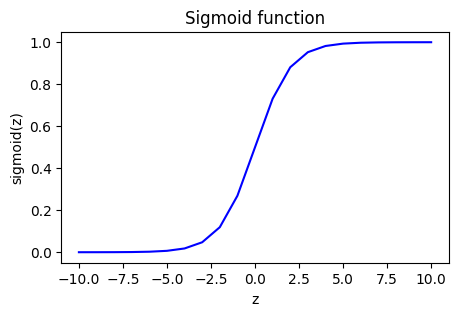

In [35]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
#draw_vthresh(ax,0)

Cost function

In [46]:
start_index = 0  # Start index (inclusive)
end_index = 187    # End index (exclusive)

# Splitting the array using slicing
split_array = column_arrays[59][start_index:end_index]


In [37]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - split_array))
            db = (1 / num_samples) * np.sum(predictions - split_array)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]

# Initialize logistic regression model
model = LogisticRegressionGD(learning_rate=0.01, num_iterations=1000)
# Fit the model
model.fit(X_train, Y_train)

# Make predictions on test data (X_test)
predictions = model.predict(X_test)
#tes_data_accuracy=accuracy_score(predictions, split_array)


In [38]:
def compute_cost_logistic(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

In [39]:
w_tmp = np.array([1,1])
b_tmp = -3
#print(compute_cost_logistic(X, y, w_tmp, b_tmp))

Model Evaluation

In [52]:
# accuracy on training data
X_train_prediction=model.predict(X_train)
#X_train_prediction = ["M" if i == 1 else "R" for i in X_train_prediction]
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [53]:
print("Accuracy of training data:",training_data_accuracy)

Accuracy of training data: 0.8342245989304813


In [54]:
X_test_prediction=model.predict(X_test)
#X_train_prediction = ["M" if i == 1 else "R" for i in X_test_prediction]
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [55]:
print("Accuracy on test data :",test_data_accuracy)

Accuracy on test data : 0.7619047619047619


Making a predictive system

In [56]:
input_data=(0.0,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
#changing the input data to a numpy array
input_numpy = np.asarray(input_data)

# reshape the np array
input_reshape = input_numpy.reshape(1,-1)
prediction = model.predict(input_reshape)
print(prediction)

if (prediction[0]=='R'):
  print("object is a rock")
else:
  print("object is a mine")

['R']
object is a rock
